# 37 Classes from the Oxford-IIIT Pet Dataset

In [1]:
from __future__ import print_function
from __future__ import division
import torchvision.transforms.functional as TF
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

print('PyTorch Version: ', torch.__version__)
print('Torchvision Version: ', torchvision.__version__)

PyTorch Version:  2.0.1
Torchvision Version:  0.15.2


## Hyper parameters

In [2]:
batch_size = 80

num_epochs = 20

num_classes = 37

## M1 Mac Optimisation

In [3]:
# Run on M1 chip
device = torch.device('mps')

## Init the model

In [4]:
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
input_size = 224

/Users/ludwig/google-drive/DD2424-Deep-Learning-in-Data-Science/Project/project-venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ludwig/google-drive/DD2424-Deep-Learning-in-Data-Science/Project/project-venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Testing the model

## Augmentatinos

In [5]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomOrder([
            transforms.RandomResizedCrop(input_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.01, hue=0.01),
            transforms.RandomRotation(degrees=30),
            transforms.RandomGrayscale(p=0.3),
            transforms.RandomApply([transforms.GaussianBlur((3, 3), (1.0, 2.0)),], p=0.1),
            transforms.RandomPerspective(distortion_scale=0.8, p=0.4, interpolation=3, fill=0),
            transforms.RandomApply([transforms.GaussianBlur((3, 3), (1.0, 2.0)),], p=0.2),
        ]),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        transforms.RandomErasing(p=0.25, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False),
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

## Load the data

In [6]:
data_dir = 'Dataset/all_races_80'

folders = ['train', 'val', 'test']

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in folders}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in folders}

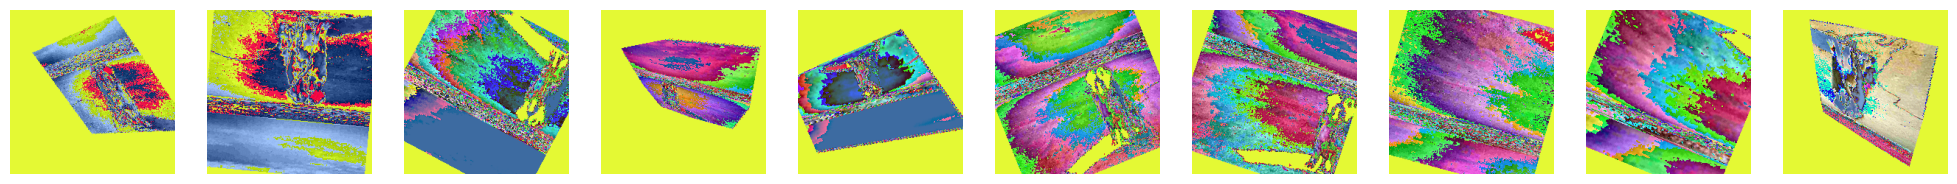

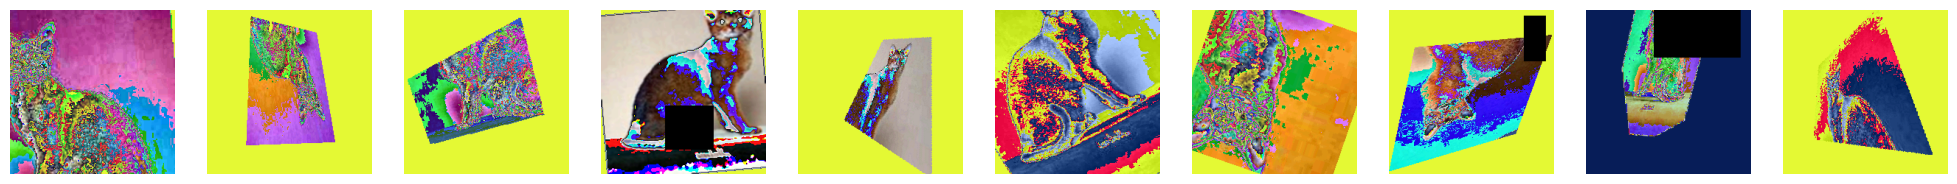

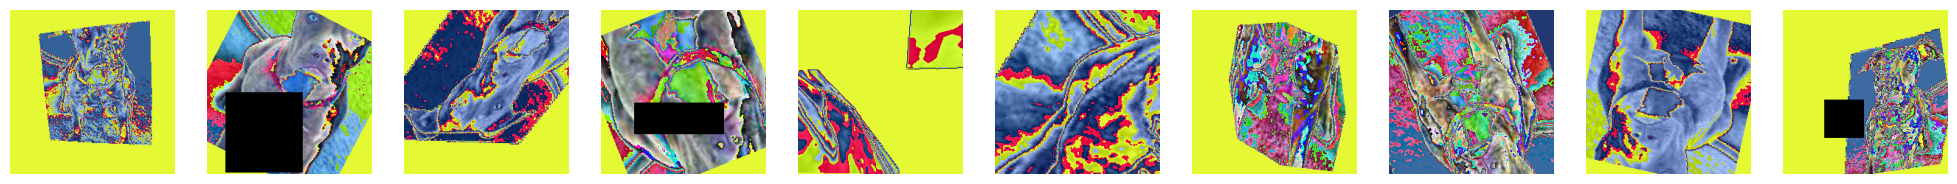

In [7]:
def visualize_augmentations(dataset, idx=0, samples=10, use_transforms=None):
    """
    Given a Pytorch Dataset object, this will visualize a set of augmented images
    for the item at the provided index.
    """
    dataset = copy.deepcopy(dataset)  # we don't want to modify the actual dataset
    dataset.transform = use_transforms
    fig, axs = plt.subplots(1, samples, figsize=(samples * 2.5 , 2.5))
    for i in range(samples):
        img, label = dataset[idx]
        axs[i].imshow(TF.to_pil_image(img))
        axs[i].axis('off')
    plt.show()

use_transforms = data_transforms['train']

samples = 10

visualize_augmentations(image_datasets['train'], 2400, samples, use_transforms)
visualize_augmentations(image_datasets['train'], 11, samples, use_transforms)
visualize_augmentations(image_datasets['train'], 1102, samples, use_transforms)

## Print model

In [8]:
# Send the model to GPU
model_ft = model.to(device)

params_to_update = model_ft.parameters()
print('All params in the network:')
for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
        print('\t', name)

All params in the network:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.0.conv3.weight
	 layer1.0.bn3.weight
	 layer1.0.bn3.bias
	 layer1.0.downsample.0.weight
	 layer1.0.downsample.1.weight
	 layer1.0.downsample.1.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer1.1.conv3.weight
	 layer1.1.bn3.weight
	 layer1.1.bn3.bias
	 layer1.2.conv1.weight
	 layer1.2.bn1.weight
	 layer1.2.bn1.bias
	 layer1.2.conv2.weight
	 layer1.2.bn2.weight
	 layer1.2.bn2.bias
	 layer1.2.conv3.weight
	 layer1.2.bn3.weight
	 layer1.2.bn3.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.conv3.weight
	 layer2.0.bn3.weight
	 layer2.0.bn3.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsampl

## Train the model

In [9]:
schedule = [
    {
        'learning_rate': 1e-3,
        'epoch': 0,
        'layers_to_unfreeze': [
            'fc',
            'avgpool',
        ],
    },
    {
        'learning_rate': 1e-4,
        'epoch': num_epochs // 5,
        'layers_to_unfreeze': [
            'fc',
            'avgpool',
            'layer4',
        ],
    },
    {
        'learning_rate': 1e-4,
        'epoch': num_epochs * 2 // 5,
        'layers_to_unfreeze': [
            'fc',
            'avgpool',
            'layer4',
            'layer3',
        ],
    },
    {
        'learning_rate': 1e-4,
        'epoch': num_epochs * 3 // 5,
        'layers_to_unfreeze': [
            'fc',
            'avgpool',
            'layer4',
            'layer3',
            'layer2',
        ],
    },
    {
        'learning_rate': 1e-5,
        'epoch': num_epochs * 4 // 5,
        'layers_to_unfreeze': [
            'fc',
            'avgpool',
            'layer4',
            'layer3',
            'layer2',
            'layer1'
        ],
    },
]

unfreezing: avgpool
unfreezing: fc
Epoch 1/20
current config {'learning_rate': 0.001, 'epoch': 0, 'layers_to_unfreeze': ['fc', 'avgpool']}
unfreezing: avgpool
unfreezing: fc
Train Loss: 3.2226 Acc: 0.1846
Val Loss: 1.9993 Acc: 0.5365


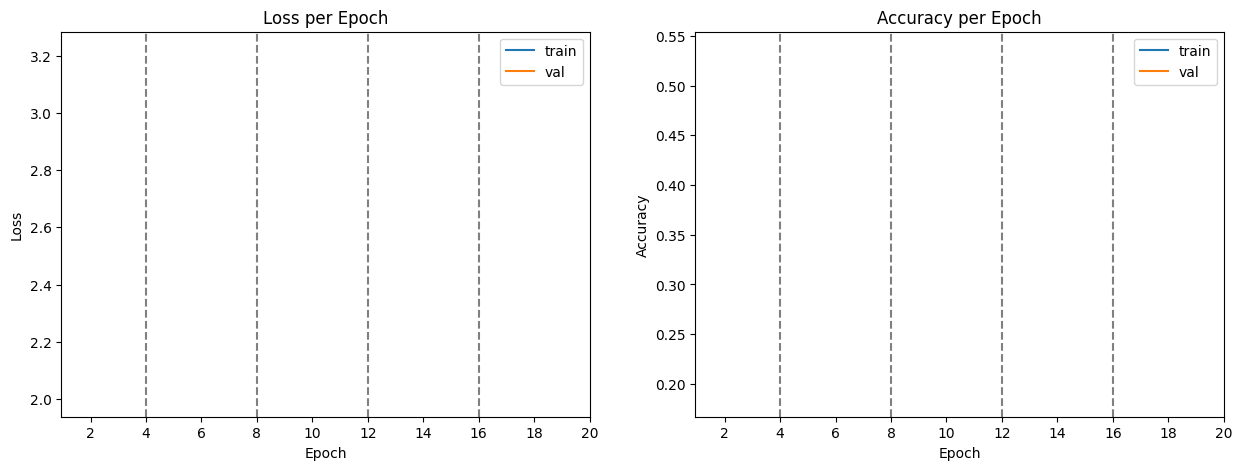

Epoch 2/20
current config {'learning_rate': 0.001, 'epoch': 0, 'layers_to_unfreeze': ['fc', 'avgpool']}
unfreezing: avgpool
unfreezing: fc
Train Loss: 2.5102 Acc: 0.3570
Val Loss: 1.2032 Acc: 0.8035


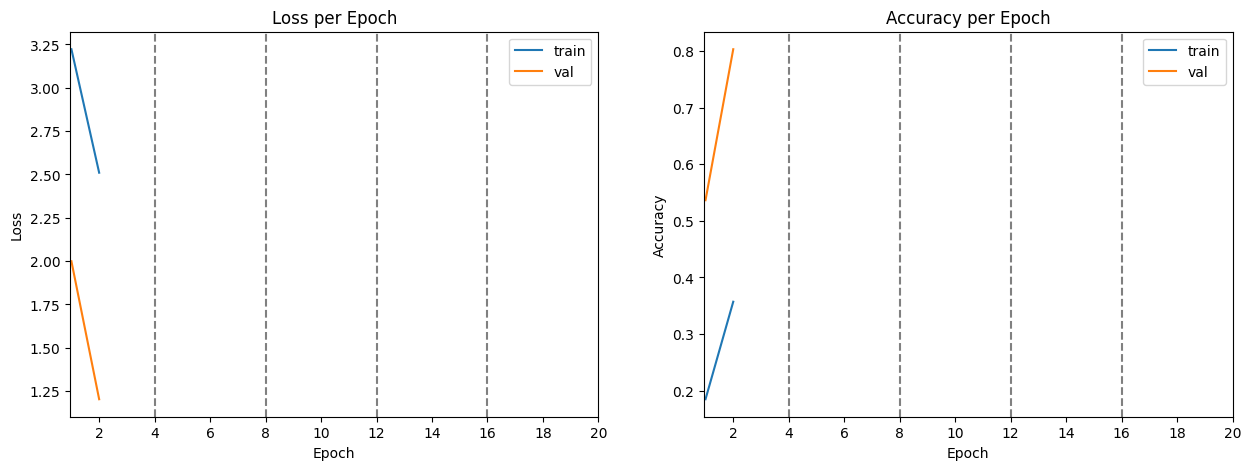

Epoch 3/20
current config {'learning_rate': 0.001, 'epoch': 0, 'layers_to_unfreeze': ['fc', 'avgpool']}
unfreezing: avgpool
unfreezing: fc
Train Loss: 2.1434 Acc: 0.4478
Val Loss: 0.8954 Acc: 0.8446


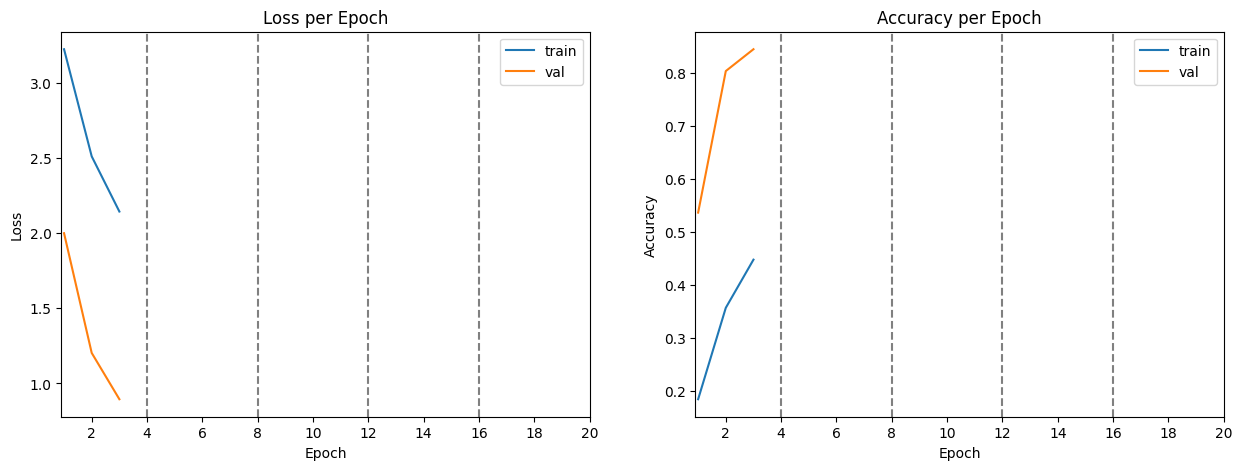

Epoch 4/20
current config {'learning_rate': 0.001, 'epoch': 0, 'layers_to_unfreeze': ['fc', 'avgpool']}
unfreezing: avgpool
unfreezing: fc
Train Loss: 2.0206 Acc: 0.4590
Val Loss: 0.7003 Acc: 0.8566


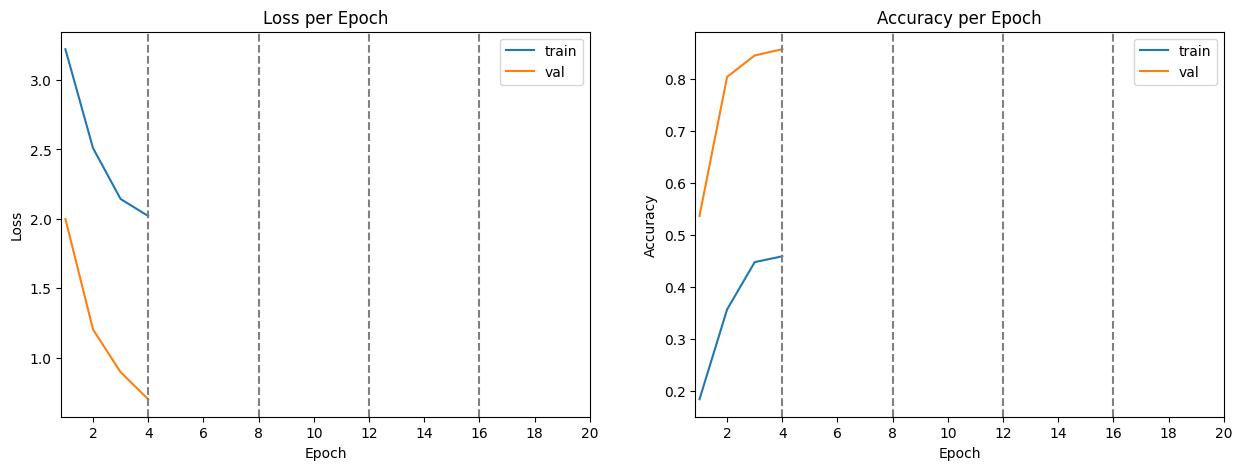

Epoch 5/20
current config {'learning_rate': 0.0001, 'epoch': 4, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4']}
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.7792 Acc: 0.5301
Val Loss: 0.4826 Acc: 0.9017


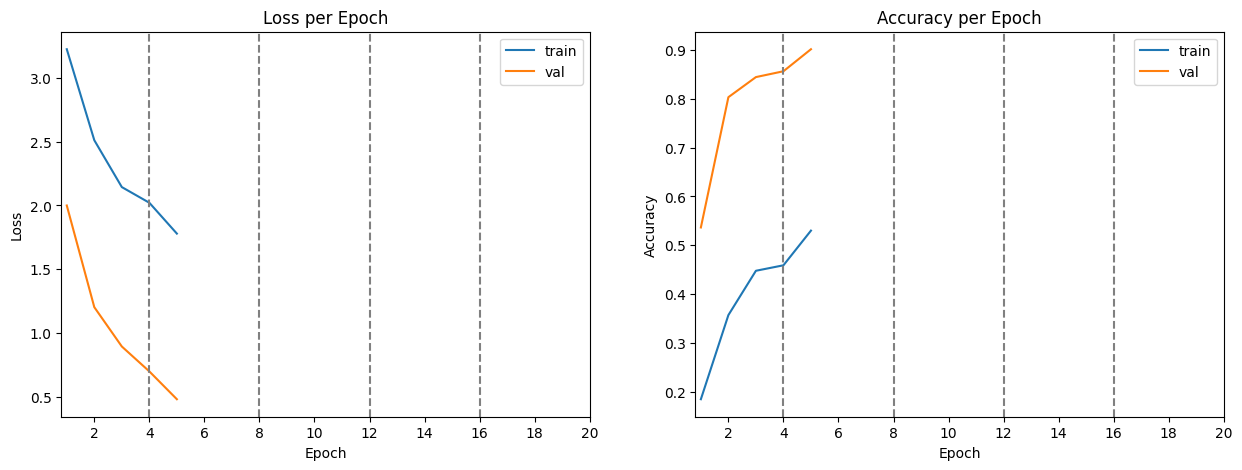

Epoch 6/20
current config {'learning_rate': 0.0001, 'epoch': 4, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4']}
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.6788 Acc: 0.5376
Val Loss: 0.3941 Acc: 0.9137


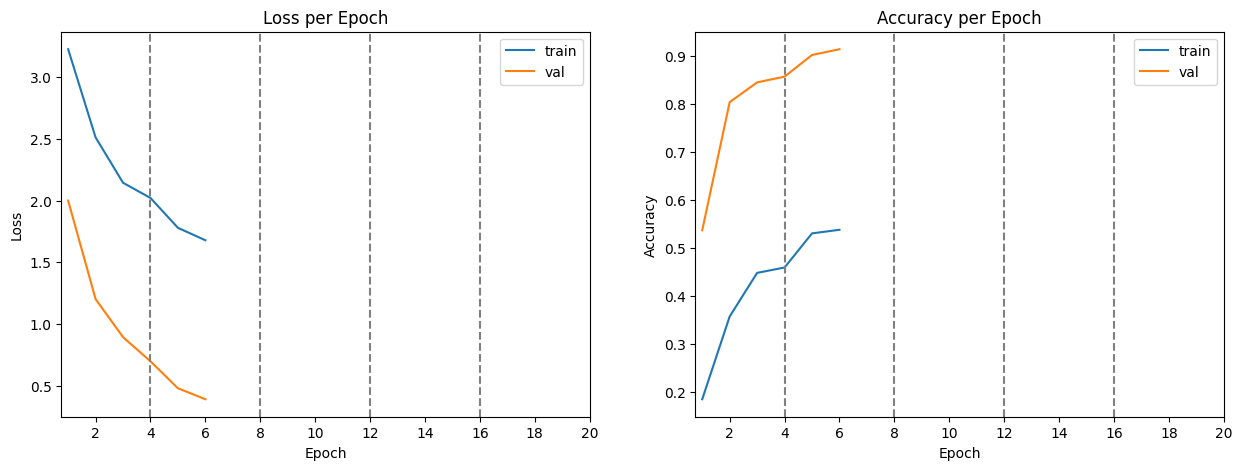

Epoch 7/20
current config {'learning_rate': 0.0001, 'epoch': 4, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4']}
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.5921 Acc: 0.5498
Val Loss: 0.3705 Acc: 0.9097


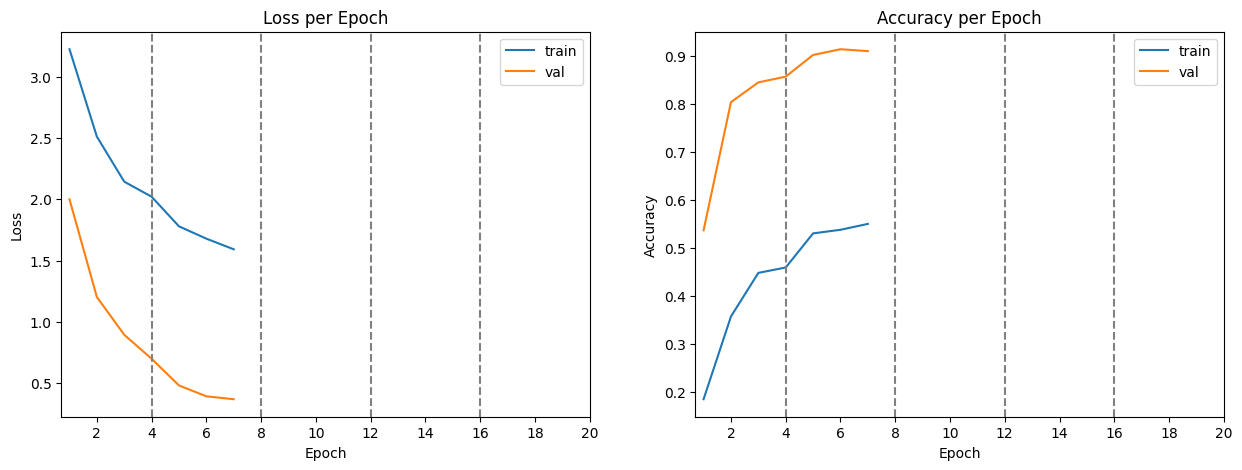

Epoch 8/20
current config {'learning_rate': 0.0001, 'epoch': 4, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4']}
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.5762 Acc: 0.5570
Val Loss: 0.3504 Acc: 0.9137


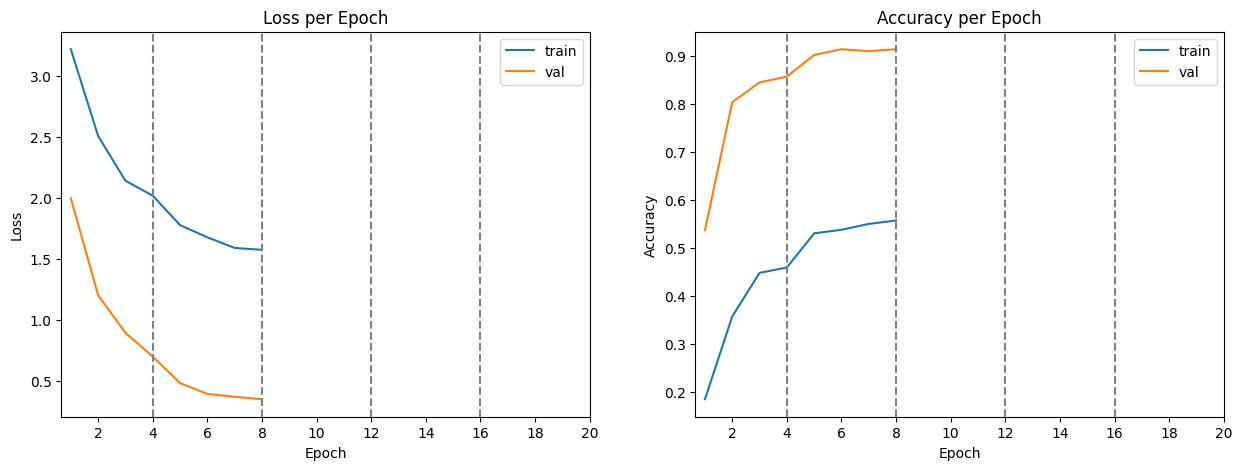

Epoch 9/20
current config {'learning_rate': 0.0001, 'epoch': 8, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer3']}
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.5051 Acc: 0.5706
Val Loss: 0.3178 Acc: 0.9216


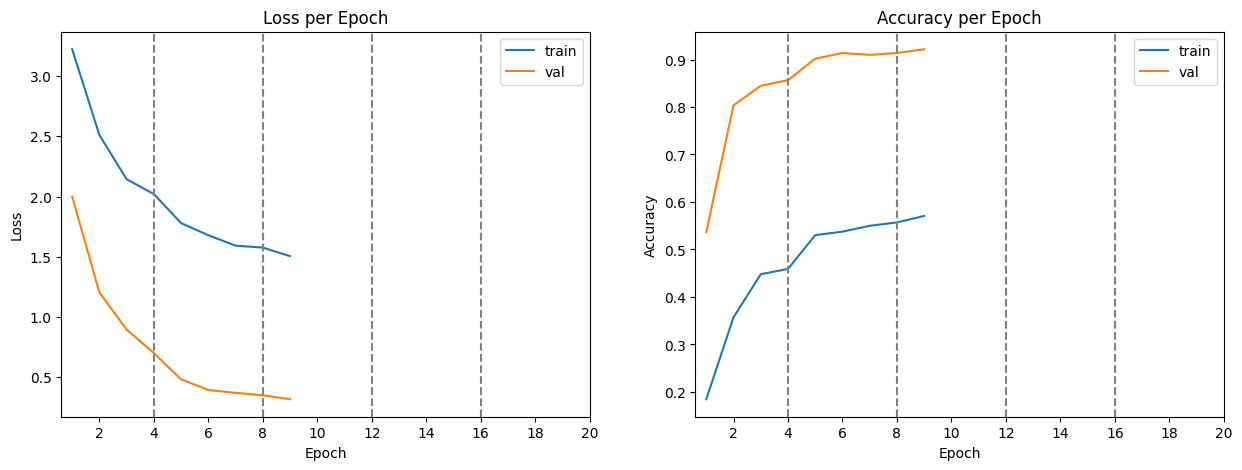

Epoch 10/20
current config {'learning_rate': 0.0001, 'epoch': 8, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer3']}
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.4004 Acc: 0.6032
Val Loss: 0.3037 Acc: 0.9177


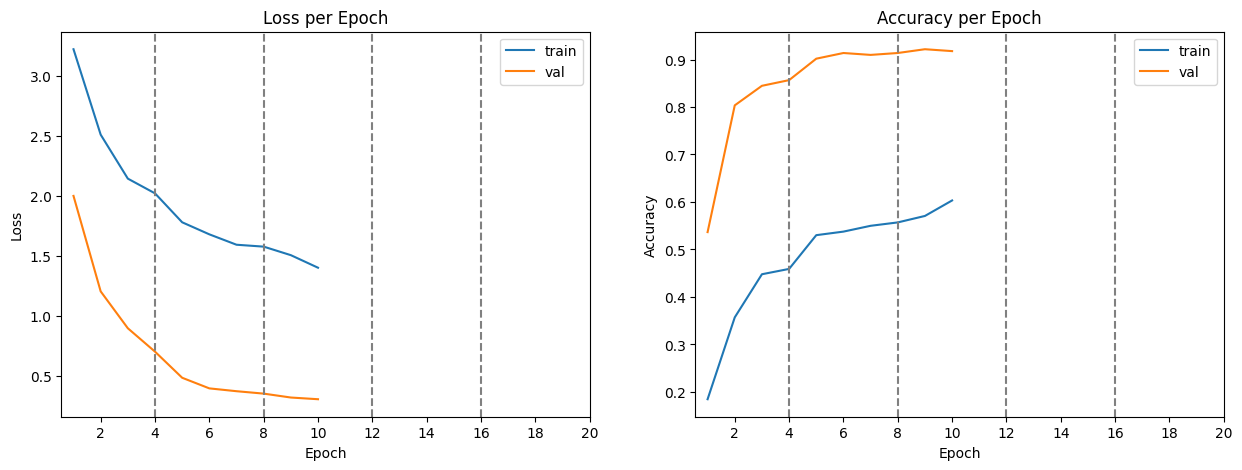

Epoch 11/20
current config {'learning_rate': 0.0001, 'epoch': 8, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer3']}
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.3995 Acc: 0.5933
Val Loss: 0.2862 Acc: 0.9296


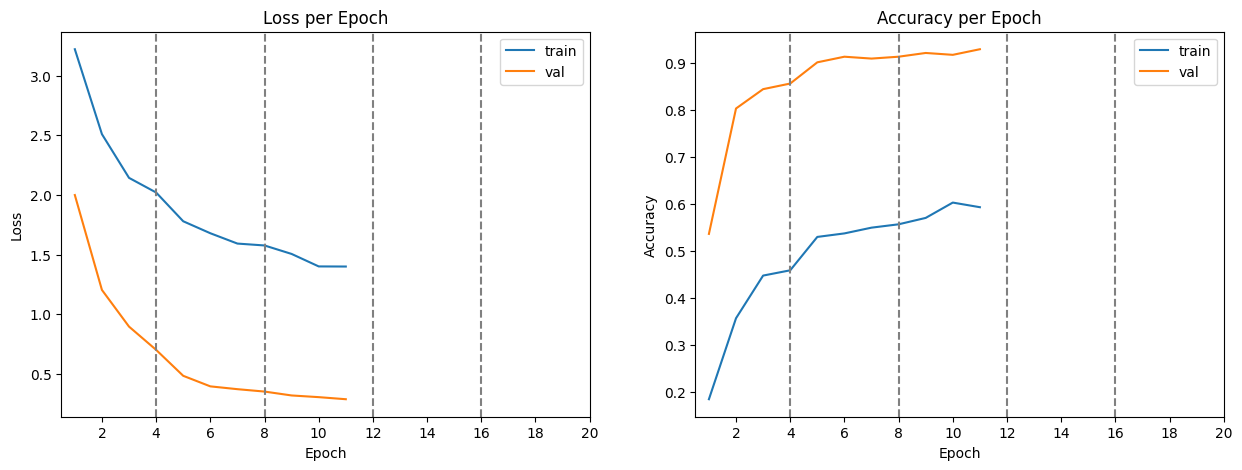

Epoch 12/20
current config {'learning_rate': 0.0001, 'epoch': 8, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer3']}
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.3534 Acc: 0.6059
Val Loss: 0.2663 Acc: 0.9283


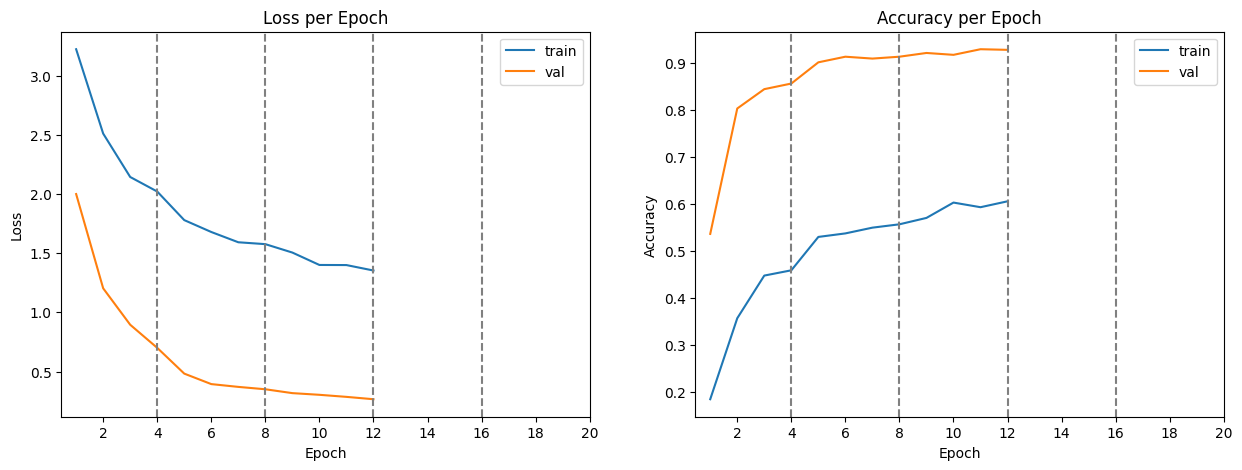

Epoch 13/20
current config {'learning_rate': 0.0001, 'epoch': 12, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer4', 'layer3']}
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.3257 Acc: 0.6151
Val Loss: 0.2569 Acc: 0.9283


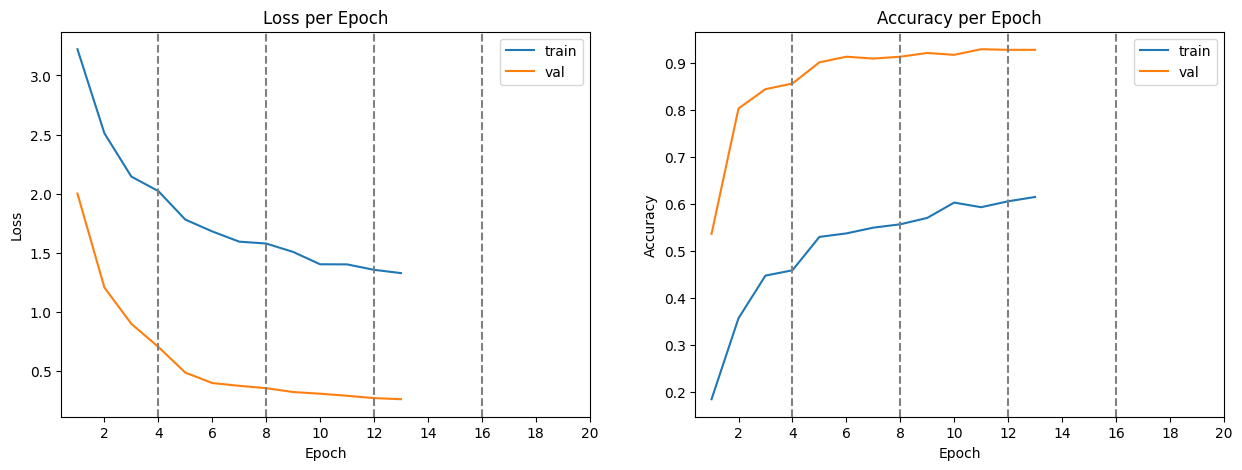

Epoch 14/20
current config {'learning_rate': 0.0001, 'epoch': 12, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer4', 'layer3']}
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.2914 Acc: 0.6253
Val Loss: 0.2538 Acc: 0.9336


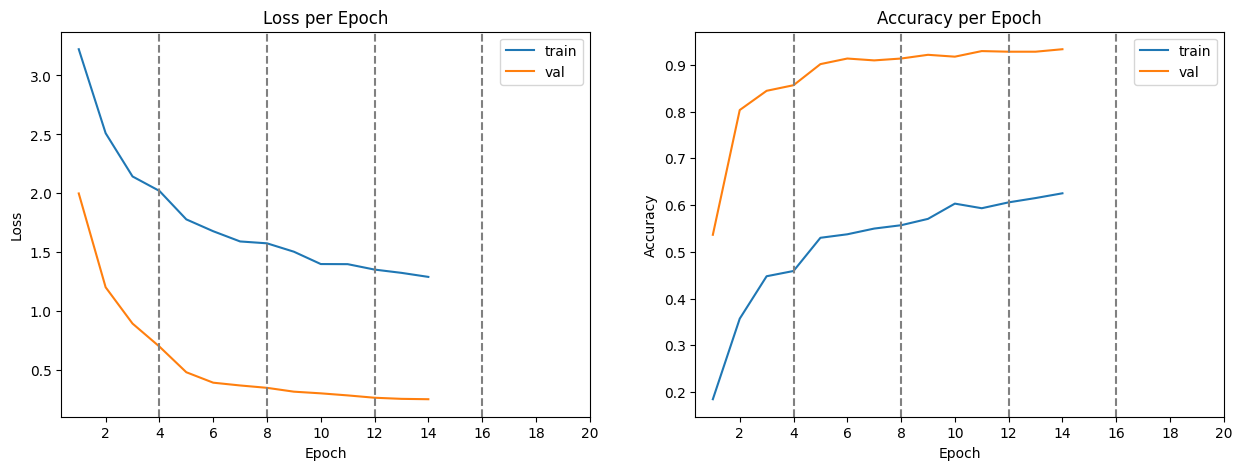

Epoch 15/20
current config {'learning_rate': 0.0001, 'epoch': 12, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer4', 'layer3']}
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.2461 Acc: 0.6311
Val Loss: 0.2424 Acc: 0.9270


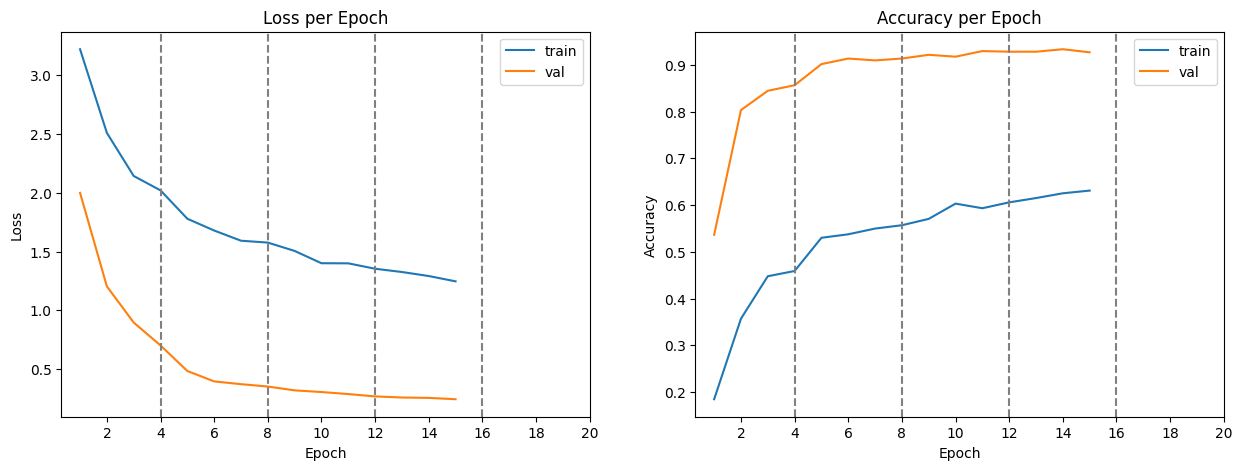

Epoch 16/20
current config {'learning_rate': 0.0001, 'epoch': 12, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer4', 'layer3']}
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.1870 Acc: 0.6481
Val Loss: 0.2286 Acc: 0.9389


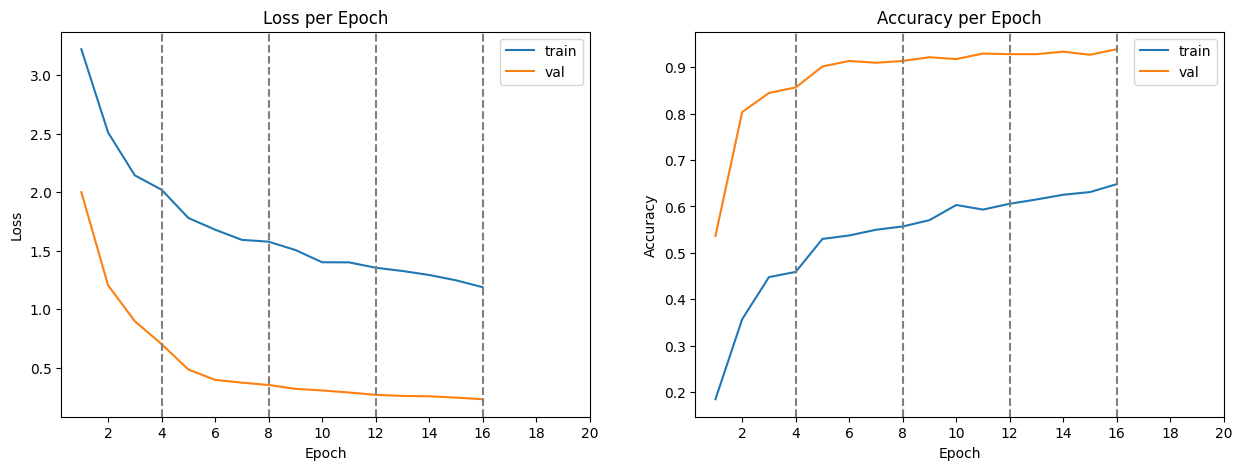

Epoch 17/20
current config {'learning_rate': 1e-05, 'epoch': 16, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer3', 'layer2', 'layer1']}
unfreezing: layer1
unfreezing: layer2
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.1769 Acc: 0.6586
Val Loss: 0.2305 Acc: 0.9416


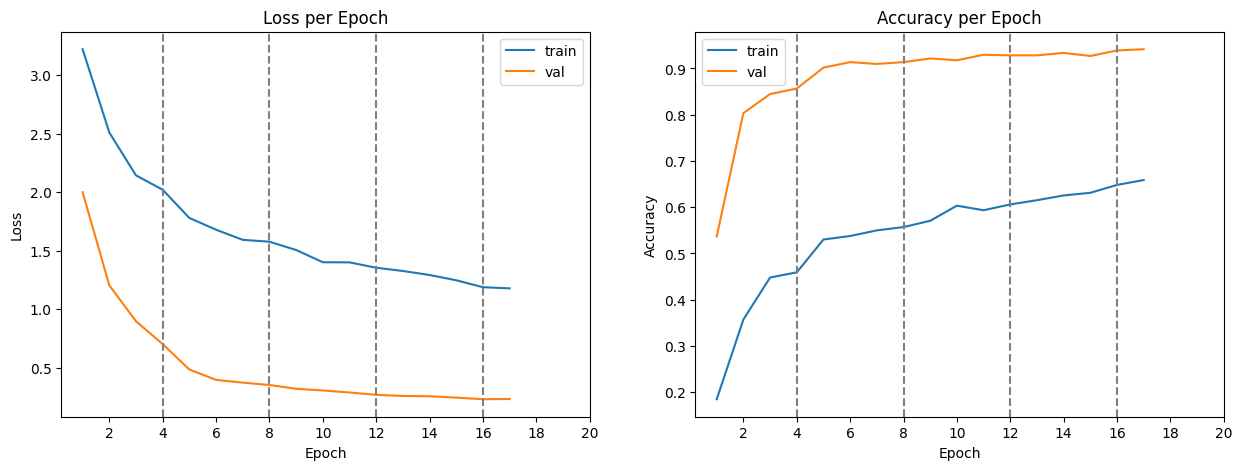

Epoch 18/20
current config {'learning_rate': 1e-05, 'epoch': 16, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer3', 'layer2', 'layer1']}
unfreezing: layer1
unfreezing: layer2
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.1643 Acc: 0.6678
Val Loss: 0.2291 Acc: 0.9416


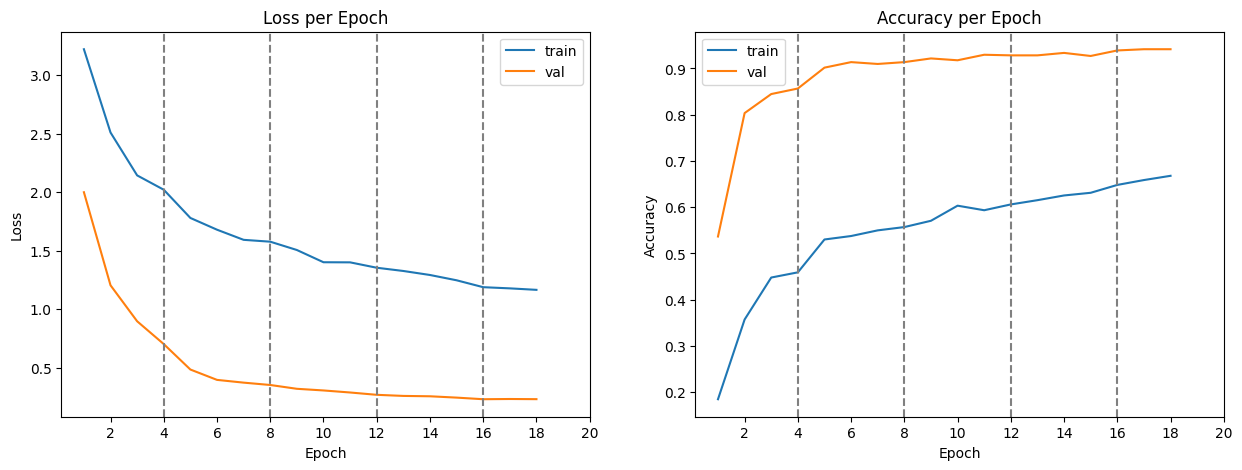

Epoch 19/20
current config {'learning_rate': 1e-05, 'epoch': 16, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer3', 'layer2', 'layer1']}
unfreezing: layer1
unfreezing: layer2
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.1424 Acc: 0.6651
Val Loss: 0.2286 Acc: 0.9349


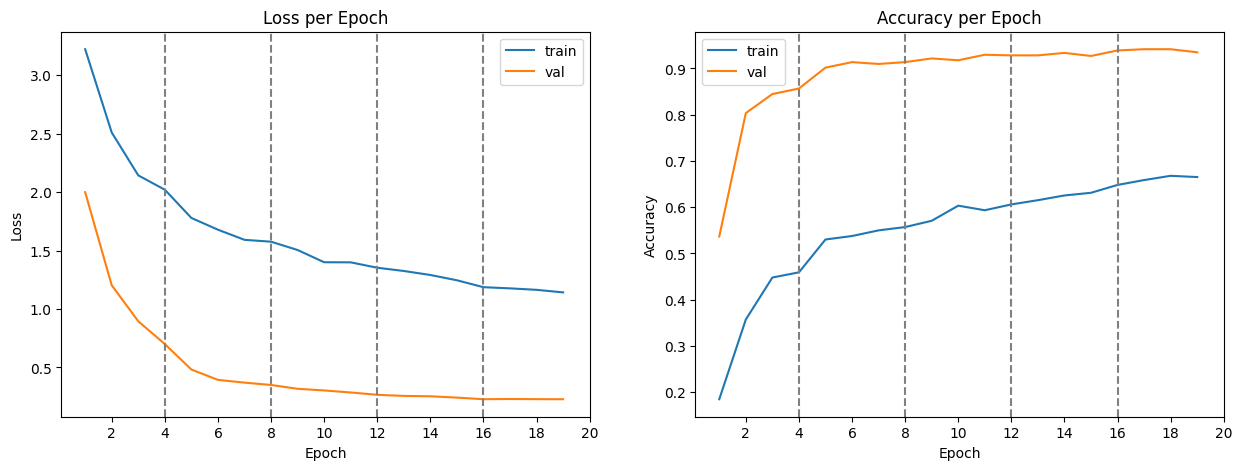

Epoch 20/20
current config {'learning_rate': 1e-05, 'epoch': 16, 'layers_to_unfreeze': ['fc', 'avgpool', 'layer4', 'layer3', 'layer2', 'layer1']}
unfreezing: layer1
unfreezing: layer2
unfreezing: layer3
unfreezing: layer4
unfreezing: avgpool
unfreezing: fc
Train Loss: 1.1293 Acc: 0.6702
Val Loss: 0.2276 Acc: 0.9389


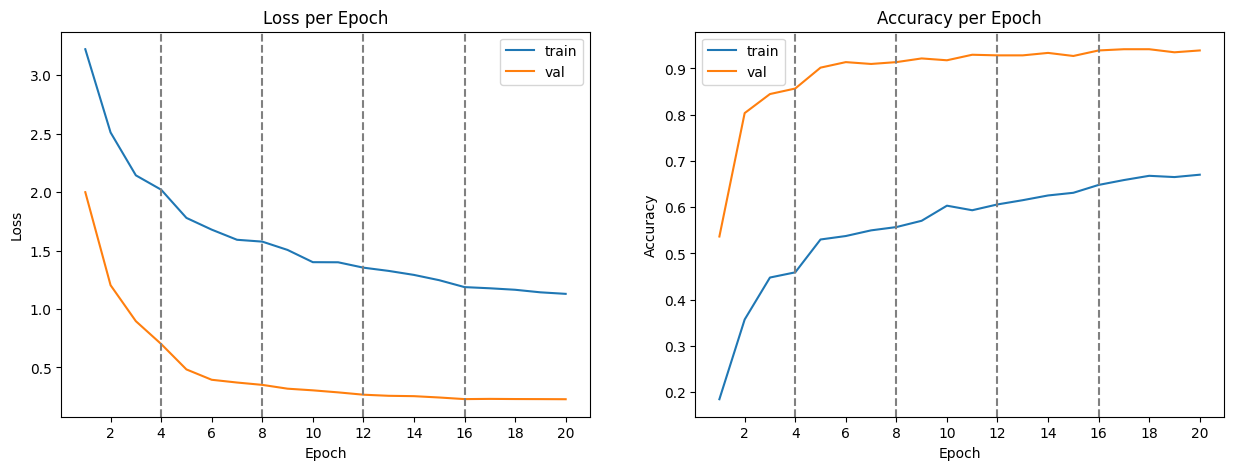

Training complete in 31m 21s
Best val Acc: 0.941567


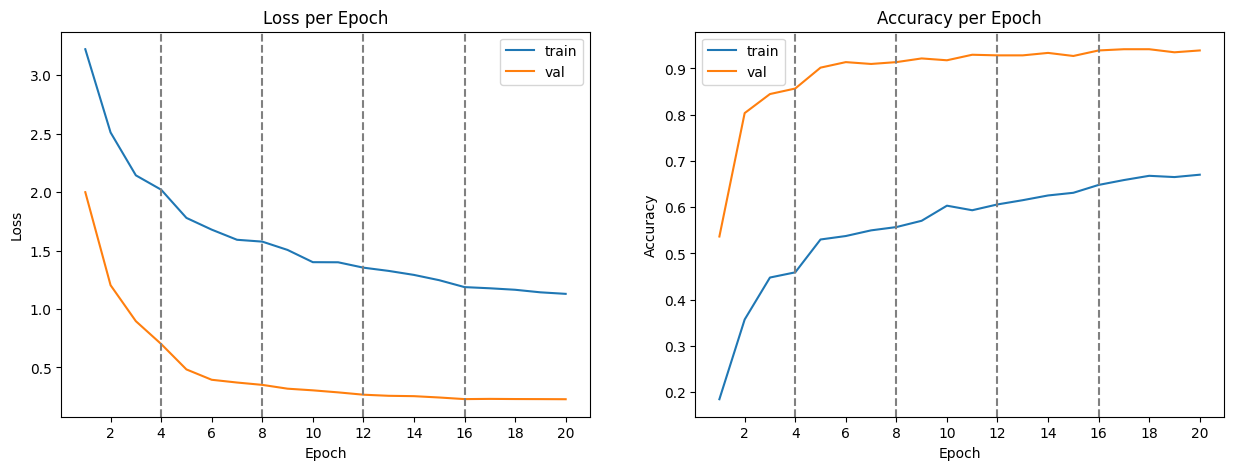

In [10]:
class Trainer:
    def __init__(self, model, criterion, dataloaders, device, num_epochs=25, schedule=None):
        self.model = model
        self.criterion = criterion
        self.dataloaders = dataloaders
        self.device = device
        self.num_epochs = num_epochs
        self.schedule = schedule
        self.current_schedule = 0

        self.learning_rate = schedule[0]['learning_rate']
        self.layers_to_unfreeze = schedule[0]['layers_to_unfreeze']

        self.optimizer = self.unfreeze_layers_and_update_optimizer()

        self.train_acc_history = []
        self.train_loss_history = []
        self.val_acc_history = []
        self.val_loss_history = []

        self.best_model_wts = copy.deepcopy(model.state_dict())
        self.best_acc = 0.0
        self.start_time = time.time()

    def unfreeze_layers_and_update_optimizer(self):
        optimizer_params = []

        for name, child in self.model.named_children():
            if name in self.layers_to_unfreeze:
                print(f'unfreezing: {name}')
                for param in child.parameters():
                    param.requires_grad = True

                    # Define different learning rates for different layers
                    if name == 'layer4':
                        lr = self.learning_rate / 10
                    elif name == 'layer3':
                        lr = self.learning_rate / 50
                    elif name == 'layer2':
                        lr = self.learning_rate / 100
                    elif name == 'layer1':
                        lr = self.learning_rate / 500
                    else:
                        lr = self.learning_rate

                    # Add parameters and corresponding learning rate to the list
                    optimizer_params.append({'params': param, 'lr': lr})
            else:
                for param in child.parameters():
                    param.requires_grad = False

        optimizer = torch.optim.Adam(optimizer_params)

        return optimizer

    def update_schedule(self, epoch):
        curr_entry = None
        curr_epoch = -1
        for entry in schedule:
            entry_epoch = entry['epoch']
            if entry_epoch <= epoch and entry_epoch > curr_epoch:
                curr_entry = entry
                curr_epoch = entry_epoch

        print('current config', curr_entry)
        self.learning_rate = curr_entry['learning_rate']
        self.layers_to_unfreeze = curr_entry['layers_to_unfreeze']
        self.optimizer = self.unfreeze_layers_and_update_optimizer()

    def train(self):
        for epoch in range(self.num_epochs):
            print('Epoch {}/{}'.format(epoch + 1, self.num_epochs))
            self.update_schedule(epoch)
            self.train_one_epoch(epoch)
            self.validate(epoch)

        self.finalize_training()

    def train_one_epoch(self, epoch):
        self.model.train()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in self.dataloaders['train']:
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            self.optimizer.zero_grad()

            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            loss.backward()
            self.optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(self.dataloaders['train'].dataset)
        epoch_acc = running_corrects.float() / len(self.dataloaders['train'].dataset)

        self.train_acc_history.append(epoch_acc.item())
        self.train_loss_history.append(epoch_loss)

        print('Train Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    def validate(self, epoch):
        self.model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in self.dataloaders['val']:
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            with torch.no_grad():
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(self.dataloaders['val'].dataset)
        epoch_acc = running_corrects.float() / len(self.dataloaders['val'].dataset)

        if epoch_acc > self.best_acc:
            self.best_acc = epoch_acc
            self.best_model_wts = copy.deepcopy(self.model.state_dict())

        self.val_acc_history.append(epoch_acc.item())
        self.val_loss_history.append(epoch_loss)

        print('Val Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        self.plot_histories()

    def plot_histories(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        epochs = range(1, self.num_epochs + 1)
        even_epochs = [epoch for epoch in epochs if epoch % 2 == 0]

        ax1.plot(epochs, np.pad(self.train_loss_history, (0, self.num_epochs - len(self.train_loss_history)), mode='constant', constant_values=None), label='train')
        ax1.plot(epochs, np.pad(self.val_loss_history, (0, self.num_epochs - len(self.val_loss_history)), mode='constant', constant_values=None), label='val')
        ax1.set_title('Loss per Epoch')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_xticks(even_epochs)

        ax2.plot(epochs, np.pad(self.train_acc_history, (0, self.num_epochs - len(self.train_acc_history)), mode='constant', constant_values=None), label='train')
        ax2.plot(epochs, np.pad(self.val_acc_history, (0, self.num_epochs - len(self.val_acc_history)), mode='constant', constant_values=None), label='val')
        ax2.set_title('Accuracy per Epoch')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.set_xticks(even_epochs)

        # Add vertical lines to show the start of each phase
        for i in range(1, len(self.schedule)):
            epoch = self.schedule[i]['epoch']
            ax1.axvline(x=epoch, color='grey', linestyle='--')
            ax2.axvline(x=epoch, color='grey', linestyle='--')

        ax1.legend()
        ax2.legend()

        plt.show()



    def finalize_training(self):
        time_elapsed = time.time() - self.start_time
        print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print('Best val Acc: {:4f}'.format(self.best_acc))

        self.model.load_state_dict(self.best_model_wts)
        self.plot_histories()


criterion = torch.nn.CrossEntropyLoss()

trainer = Trainer(
    model=model,
    criterion=criterion,
    dataloaders=dataloaders,
    device=device,
    num_epochs=num_epochs,
    schedule=schedule,
)

trainer.train()

## Test the model

In [11]:
model.eval()

running_loss = 0.0
running_corrects = 0

for inputs, labels in dataloaders['test']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.set_grad_enabled(False):
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)

epoch_loss = running_loss / len(dataloaders['test'].dataset)
epoch_acc = running_corrects.float() / len(dataloaders['test'].dataset)

print('Testing the model\n')
print('{} Loss: {:.4f} Acc: {:.4f}'.format('test', epoch_loss, epoch_acc))

Testing the model

test Loss: 0.2816 Acc: 0.9217
